In [9]:
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Activation, Dropout, Conv2D, MaxPooling2D,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import pandas as pd

In [2]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [3]:
y=np.array(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [5]:
Input = tf.keras.Input(shape=(200, 200,1))

x= tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')(Input)
x=tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x= tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
x= tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
Output=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs=Input,outputs=Output)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
erly = EarlyStopping(monitor='val_loss',
                     restore_best_weights=True ,
                     verbose=0, patience=3)

In [12]:
model.fit( x=X_train,
    y=y_train,
    batch_size=200,
    epochs=50,
    verbose=True,validation_data=(X_test,y_test),callbacks=[erly])

Epoch 1/50
32/32 [==============================] - 181s 5s/step - loss: 0.4674 - accuracy: 0.8645 - val_loss: 0.4298 - val_accuracy: 0.8581
Epoch 2/50
32/32 [==============================] - 130s 4s/step - loss: 0.4396 - accuracy: 0.8733 - val_loss: 0.3979 - val_accuracy: 0.8856
Epoch 3/50
32/32 [==============================] - 132s 4s/step - loss: 0.4136 - accuracy: 0.8808 - val_loss: 0.3830 - val_accuracy: 0.8500
Epoch 4/50
32/32 [==============================] - 129s 4s/step - loss: 0.3877 - accuracy: 0.8963 - val_loss: 0.3485 - val_accuracy: 0.8875
Epoch 5/50
32/32 [==============================] - 130s 4s/step - loss: 0.3645 - accuracy: 0.8995 - val_loss: 0.3325 - val_accuracy: 0.8913
Epoch 6/50
32/32 [==============================] - 130s 4s/step - loss: 0.3457 - accuracy: 0.9091 - val_loss: 0.3018 - val_accuracy: 0.8975
Epoch 7/50
32/32 [==============================] - 129s 4s/step - loss: 0.3270 - accuracy: 0.9106 - val_loss: 0.2908 - val_accuracy: 0.9069
Epoch 8/50
32

In [13]:
loss= pd.DataFrame(model.history.history)

<AxesSubplot:>

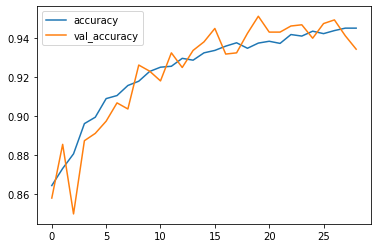

In [14]:
loss[['accuracy','val_accuracy']].plot()

In [15]:
model.save('Crack_Detection_CNN.model')

INFO:tensorflow:Assets written to: Crack_Detection_CNN.model\assets
